## **Importing Necessary Libraries**

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Importing Datasets Into Pandas Dataframe**

In [2]:
sales = pd.read_excel(r"C:\Users\Lenovo\Downloads\Sales_target_1.xlsx")
orders_list = pd.read_excel(r"C:\Users\Lenovo\Downloads\List_of_Orders_1.xlsx")
order_details = pd.read_excel(r"C:\Users\Lenovo\Downloads\Order_Details_1.xlsx")

## **Part 1 Sales And Profitability Analysis**
### **Question 1** 
**Calculating the total sales (Amount) for each category across all orders.**

In [3]:
merged_df = pd.merge(
    orders_list,
    order_details,
    on="Order ID",   
    how="inner"      
)

category_sales = (
    merged_df
    .groupby("Category", as_index=False)["Amount"]
    .sum()
    .rename(columns={"Amount": "Total Sales"})
)

print(category_sales)

      Category  Total Sales
0     Clothing       139054
1  Electronics       165267
2    Furniture       127181


### **Question 2**
**Calculating the average profit per order and total profit margin for each category**

In [9]:
#Group by Category and calculate totals + number of unique orders
category_stats = (
    merged_df
    .groupby("Category")
    .agg(
        Total_Amount=("Amount", "sum"),
        Total_Profit=("Profit", "sum"),
        Unique_Orders=("Order ID", "nunique")  # distinct orders in that category
    )
)

# Calculate

category_stats["Avg_Profit_per_Order"] = (
    category_stats["Total_Profit"] / category_stats["Unique_Orders"]
)

category_stats["Total_Profit_Margin_%"] = (
    category_stats["Total_Profit"] / category_stats["Total_Amount"] * 100
)

print(category_stats)

      Category  Total_Amount  Total_Profit  Unique_Orders  \
0     Clothing        139054         11163            393   
1  Electronics        165267         10494            204   
2    Furniture        127181          2298            186   

   Avg_Profit_per_Order  Total_Profit_Margin_%  
0             28.404580               8.027817  
1             51.441176               6.349725  
2             12.354839               1.806874  


### **Question 3**
**Identifying the top-performing and underperforming categories based on**

*   **Total sales (Amount) for each category**
*   **Average profit per order** 
*   **Total profit margin** 

In [4]:
#Calculating category-level metrics
category_stats = (
    merged_df
    .groupby("Category")
    .agg(
        Total_Amount=("Amount", "sum"),
        Total_Profit=("Profit", "sum"),
        Unique_Orders=("Order ID", "nunique")
    )
)

# Avoiding divide-by-zero just in case
category_stats = category_stats[category_stats["Total_Amount"] != 0]

#Adding derived metrics:
# - Average profit per order
# - Total profit margin (%)
category_stats["Avg_Profit_per_Order"] = (
    category_stats["Total_Profit"] / category_stats["Unique_Orders"]
)

category_stats["Total_Profit_Margin_%"] = (
    category_stats["Total_Profit"] / category_stats["Total_Amount"] * 100
)


category_stats = category_stats.reset_index()

print("=== Category Metrics ===")
print(category_stats)

#Identifying top-performing & underperforming categories

# Top / bottom by Total Sales (Amount)
top_sales_cat    = category_stats.loc[category_stats["Total_Amount"].idxmax()]
bottom_sales_cat = category_stats.loc[category_stats["Total_Amount"].idxmin()]

# Top / bottom by Avg Profit per Order
top_avg_profit_cat    = category_stats.loc[category_stats["Avg_Profit_per_Order"].idxmax()]
bottom_avg_profit_cat = category_stats.loc[category_stats["Avg_Profit_per_Order"].idxmin()]

# Top / bottom by Profit Margin
top_margin_cat    = category_stats.loc[category_stats["Total_Profit_Margin_%"].idxmax()]
bottom_margin_cat = category_stats.loc[category_stats["Total_Profit_Margin_%"].idxmin()]

print("\n=== Top / Underperforming Categories ===")

print("\nTop category by TOTAL SALES:")
print(top_sales_cat)

print("\nUnderperforming category by TOTAL SALES:")
print(bottom_sales_cat)

print("\nTop category by AVERAGE PROFIT PER ORDER:")
print(top_avg_profit_cat)

print("\nUnderperforming category by AVERAGE PROFIT PER ORDER:")
print(bottom_avg_profit_cat)

print("\nTop category by PROFIT MARGIN (%):")
print(top_margin_cat)

print("\nUnderperforming category by PROFIT MARGIN (%):")
print(bottom_margin_cat)


=== Category Metrics ===
      Category  Total_Amount  Total_Profit  Unique_Orders  \
0     Clothing        139054         11163            393   
1  Electronics        165267         10494            204   
2    Furniture        127181          2298            186   

   Avg_Profit_per_Order  Total_Profit_Margin_%  
0             28.404580               8.027817  
1             51.441176               6.349725  
2             12.354839               1.806874  

=== Top / Underperforming Categories ===

Top category by TOTAL SALES:
Category                 Electronics
Total_Amount                  165267
Total_Profit                   10494
Unique_Orders                    204
Avg_Profit_per_Order       51.441176
Total_Profit_Margin_%       6.349725
Name: 1, dtype: object

Underperforming category by TOTAL SALES:
Category                 Furniture
Total_Amount                127181
Total_Profit                  2298
Unique_Orders                  186
Avg_Profit_per_Order     12.354839


**There are couple of factors which leads to a difference in perfomance in various categories of products. 
We will be trying to explore it on the basis of the data we have using Diagnostic Analysis.**

## 1. Clothing – High margin, high volume, mid revenue

**Metrics:**

- **Total_Amount:** 139,054  
- **Total_Profit:** 11,163  
- **Unique_Orders:** 393 *(highest)*  
- **Avg_Profit_per_Order:** 28.40  
- **Profit Margin:** 8.03% *(highest margin)*  

### What this suggests

#### High order volume, smaller basket sizes

- Clothing has the most orders (393) but not the highest revenue.  
- This usually means many customers are buying **lower-ticket items**, but **often**.

#### Strong pricing power / markups

- Profit margin of **8.0%** is the best among the three.  
- This hints that either:
  - The cost of goods is relatively **low compared to selling price**, or  
  - Clothing is **discounted less aggressively** than other categories.

#### Steady, repeatable demand

- Clothing purchases are more frequent (fashion, seasonal updates, gifts).  
- This supports **volume-based profitability**: lots of smaller orders with decent margin.

### Possible reasons Clothing outperforms on margin

- Supplier relationships and sourcing might be stronger (**better buy prices**).  
- Less price transparency than electronics (**customers can’t compare specs as easily**).  
- Lower operational costs (lighter items, simpler shipping compared to furniture).  


---




## 2. Electronics – Revenue and profit-per-order leader, mid margin

**Metrics:**

- **Total_Amount:** 165,267 *(highest revenue)*  
- **Total_Profit:** 10,494  
- **Unique_Orders:** 204 *(much fewer than Clothing)*  
- **Avg_Profit_per_Order:** 51.44 *(highest per order)*  
- **Profit Margin:** 6.35% *(good, but below Clothing)*  

### What this suggests

#### High ticket size, lower frequency

- Fewer orders (204) but **highest Total_Amount** ⇒ typical of electronics.  
- Each order is larger in value, reflected in the **highest Avg_Profit_per_Order**.

#### Reasonable margin, but cost base is higher

- Margin **6.35%** is solid but lower than Clothing’s 8.0%.  
- Electronics are usually:
  - More **expensive to procure**  
  - More exposed to **competition and price comparison**  
  - More often **discounted during promotions** (festivals, sales events)

#### Profit driven by a few big orders

- With only 204 unique orders, each order’s profitability really matters.  
- High avg profit/order suggests:
  - Many **multi-item electronics orders**, or  
  - Focus on **mid-to-high-end products** rather than small accessories.

### Possible reasons Electronics performs like this

- Higher base prices → naturally **larger revenue and profit per order**.  
- But strong competition → you likely offer **discounts**, reducing margin vs Clothing.  
- Warranty/returns, support, and logistics costs may **eat into margins**.  
- Electronics may rely more on **promotional spikes** (big sales events) rather than steady small orders.

---



## 3. Furniture – Underperformer on almost all metrics

**Metrics:**

- **Total_Amount:** 127,181 *(lowest revenue)*  
- **Total_Profit:** 2,298 *(by far the lowest)*  
- **Unique_Orders:** 186  
- **Avg_Profit_per_Order:** 12.35 *(lowest)*  
- **Profit Margin:** 1.81% *(very thin, clearly underperforming)*  

Furniture is consistently at the bottom:

- Lowest **revenue**  
- Lowest **total profit**  
- Lowest **profit per order**  
- Lowest **profit margin**  

### What this suggests

#### Extremely thin margins

- **1.81%** profit margin is almost **break-even** compared to:
  - Clothing at **8.0%**  
  - Electronics at **6.35%**  

This suggests:

- Very **high product costs**  
- **Heavy discounting** to move stock  
- **High logistics/handling costs** (large, bulky items)

#### Profit leaking in operations

Even if sales are decent (127k isn’t tiny), most profit is being eaten up. Possible leaks:

- High **shipping and installation costs**  
- **Damage, returns, replacements**  
- **Storage/warehouse costs** for bulky inventory  
- **Aggressive discounting** to clear slow-moving items  

#### Lower perceived value vs cost

- If customers see furniture as **expensive but not strongly differentiated**, you may be forced into **price wars**.  
- That drives revenue but **destroys margin**.

### Possible reasons Furniture underperforms

- High **logistics + handling costs** (delivery, installation, returns).  
- Discounting strategy focused too much on **“moving stock”** instead of **“preserving margin”**.  
- Portfolio mix issues – maybe too many **low-margin items** (e.g., basic office chairs/tables) and not enough **premium SKUs**.  
- Demand is **less frequent**, so you keep prices low or run offers to stimulate purchases.


## **Part 2**

### **Question 1**
**Calculating the percentage change in target sales for the Furniture category month-over-month.**

In [14]:
furniture_target = sales[sales["Category"] == "Furniture"].copy()

# Sorting by Month so the percent change is calculated in the correct order
furniture_target = furniture_target.sort_values("Month of Order Date")

# Calculating month-over-month % change in target sales
furniture_target["MoM_Target_Change_%"] = (
    furniture_target["Target"].pct_change() * 100
)

print(furniture_target[["Month of Order Date", "Category", "Target", "MoM_Target_Change_%"]])


   Month of Order Date   Category  Target  MoM_Target_Change_%
9           2025-01-19  Furniture   11500                  NaN
10          2025-02-19  Furniture   11600             0.869565
11          2025-03-19  Furniture   11800             1.724138
0           2025-04-18  Furniture   10400           -11.864407
1           2025-05-18  Furniture   10500             0.961538
2           2025-06-18  Furniture   10600             0.952381
3           2025-07-18  Furniture   10800             1.886792
4           2025-08-18  Furniture   10900             0.925926
5           2025-09-18  Furniture   11000             0.917431
6           2025-10-18  Furniture   11100             0.909091
7           2025-11-18  Furniture   11300             1.801802
8           2025-12-18  Furniture   11400             0.884956


### **Question 2**
**Analysing the trends to identify months with significant target fluctuations.**

In [37]:
sales["Month of Order Date"] = pd.to_datetime(sales["Month of Order Date"])

# Work at Year-Month level
sales["Month"] = sales["Month of Order Date"].dt.to_period("M")

# Aggregating in case there are multiple rows per category+month
monthly_cat = (
    sales
    .groupby(["Month", "Category"], as_index=False)["Target"]
    .sum()
)

# Sorting and computing MoM % change in Target for each category
monthly_cat = monthly_cat.sort_values(["Category", "Month"])
monthly_cat["Target_MoM_%"] = (
    monthly_cat
    .groupby("Category")["Target"]
    .pct_change() * 100
)

# Absolute MoM % for easier “significance” checks
monthly_cat["Target_MoM_abs_%"] = monthly_cat["Target_MoM_%"].abs()

# Threshold for “significant” jump/drop (you can tweak this)
threshold = 15  # 15% change or more
monthly_cat["Significant_Change"] = monthly_cat["Target_MoM_abs_%"] > threshold

# Convert Month period to timestamp for plotting
monthly_cat["Month_ts"] = monthly_cat["Month"].dt.to_timestamp()

print("Monthly targets with MoM % change and significant flags:")
print(monthly_cat)


Monthly targets with MoM % change and significant flags:
      Month     Category  Target  Target_MoM_%  Target_MoM_abs_%  \
0   2025-01     Clothing   16000           NaN               NaN   
3   2025-02     Clothing   16000      0.000000          0.000000   
6   2025-03     Clothing   16000      0.000000          0.000000   
9   2025-04     Clothing   12000    -25.000000         25.000000   
12  2025-05     Clothing   12000      0.000000          0.000000   
15  2025-06     Clothing   12000      0.000000          0.000000   
18  2025-07     Clothing   14000     16.666667         16.666667   
21  2025-08     Clothing   14000      0.000000          0.000000   
24  2025-09     Clothing   14000      0.000000          0.000000   
27  2025-10     Clothing   16000     14.285714         14.285714   
30  2025-11     Clothing   16000      0.000000          0.000000   
33  2025-12     Clothing   16000      0.000000          0.000000   
1   2025-01  Electronics   16000           NaN             

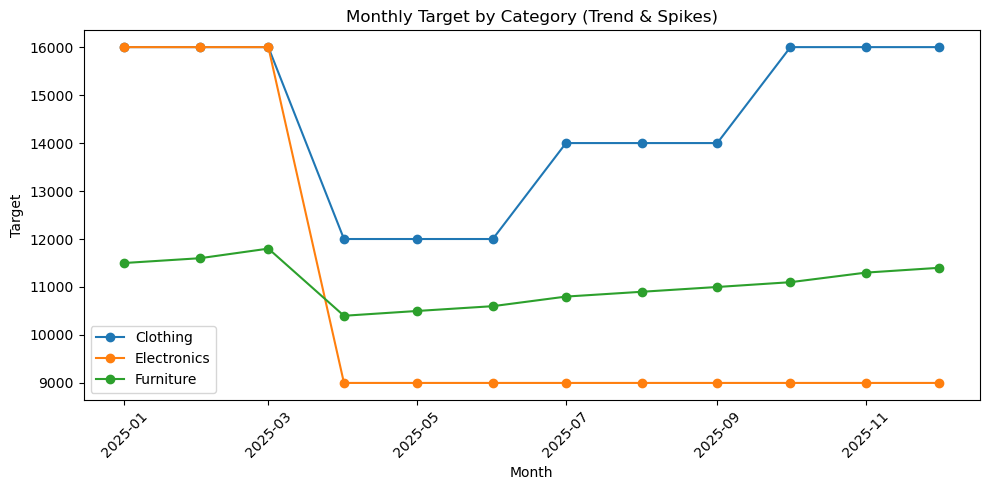

In [45]:
# Overall trend: line chart of Target by category

plt.figure(figsize=(10, 5))

for cat, grp in monthly_cat.groupby("Category"):
    plt.plot(grp["Month_ts"], grp["Target"], marker="o", label=cat)

plt.title("Monthly Target by Category (Trend & Spikes)")
plt.xlabel("Month")
plt.ylabel("Target")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



### What this means in terms of our dataset

For every **Month × Category** combination from our **Sales** file:

We see how the **targets move over time**:

- Is **Clothing** steadily rising?
- Does **Electronics** jump sharply in certain months?
- Is the **Furniture** target flat, increasing, or declining?

We can visually spot:

- **Spikes** → where targets were **increased aggressively** for a category.  
- **Drops** → where targets were **reduced**.  
- **Crossovers** → e.g., months where **Electronics** targets surpass **Clothing** targets.

---

### Business benefit

Provides a clear **visual story** of how management has set expectations per category over time.

Helps explain:

- **Seasonal strategies** (e.g., higher Electronics targets during festive months).  
- **Category focus shifts** (e.g., pushing Clothing harder in certain quarters).

Makes it easier to compare **target trends** later with **actual sales trends**, so you can judge whether target setting is:

- **Realistic and aligned with demand**, or  
- **Overly aggressive / too conservative** for specific categories.


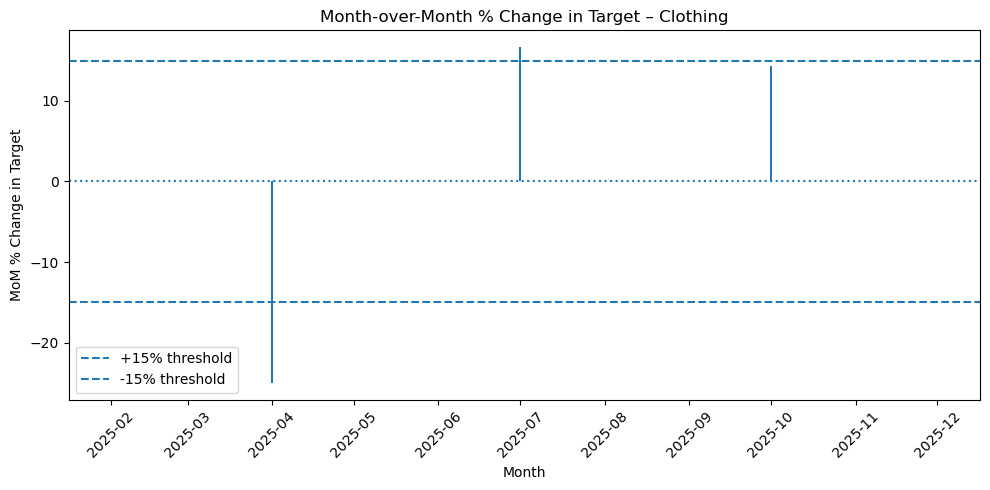

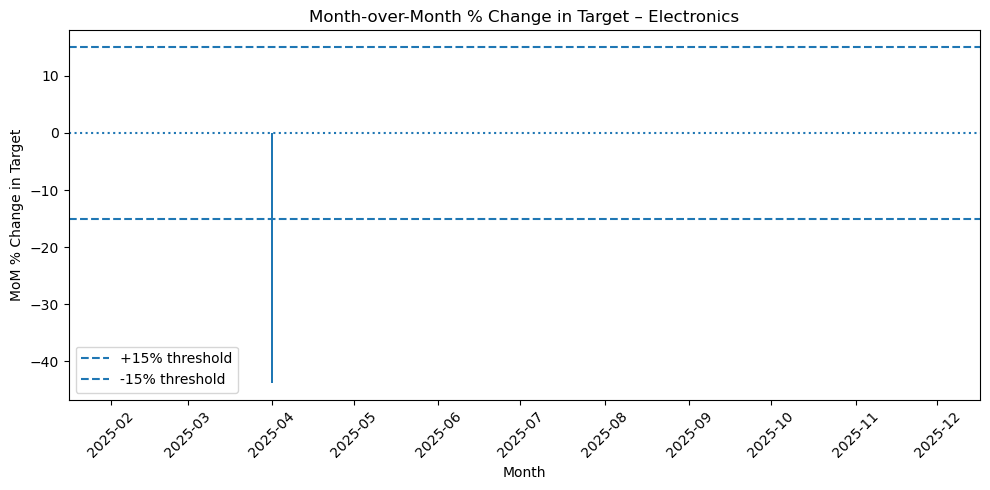

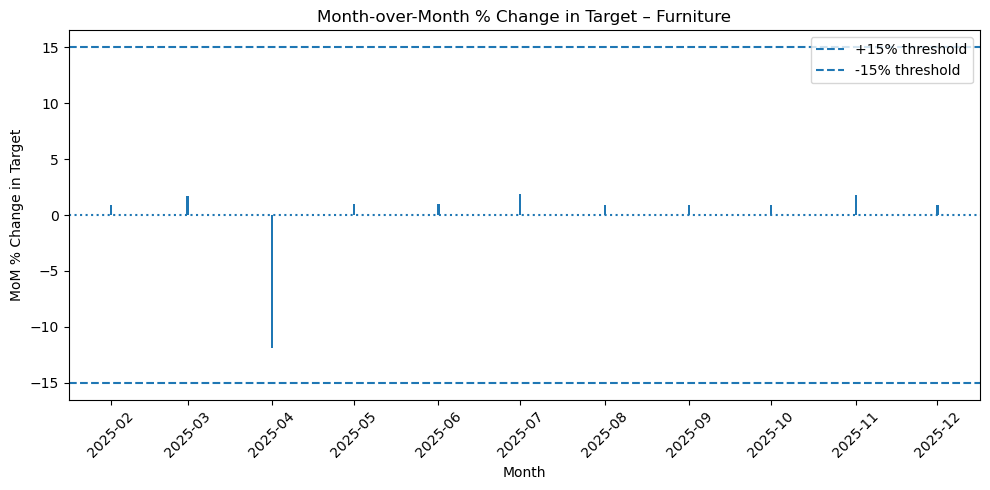

In [46]:

# MoM % change charts per category
# – highlights where targets jump or drop

for cat, grp in monthly_cat.groupby("Category"):
    plt.figure(figsize=(10, 5))
    plt.bar(grp["Month_ts"], grp["Target_MoM_%"])

    # Threshold lines to highlight "big" changes
    plt.axhline(threshold, linestyle="--", label=f"+{threshold}% threshold")
    plt.axhline(-threshold, linestyle="--", label=f"-{threshold}% threshold")
    plt.axhline(0, linestyle=":")  # no change line

    plt.title(f"Month-over-Month % Change in Target – {cat}")
    plt.xlabel("Month")
    plt.ylabel("MoM % Change in Target")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


### What this means in terms of our dataset

For each category in your **Sales** dataset (`Sales_target_1.xlsx`):

Every bar tells you:

> “In this month, we increased/decreased the target for this category by **X%** compared to last month.”

- **Tall bars above the positive threshold** → months where you **sharply increased** targets.  
- **Deep bars below the negative threshold** → months where you **heavily cut** targets.  
- **Bars close to zero** → **stable planning**, with only small adjustments month to month.

---

### Business benefit

#### 1. Compare volatility by category

- Is **Clothing** relatively stable, while **Furniture** targets jump up and down?  
- Are **Electronics** targets being revised aggressively around certain seasons?

#### 2. Justify and audit planning decisions

- You can point to specific months where management made **big strategic moves**  
  (e.g. pushing Electronics targets by **+30%** before a festival).  
- You can **question months** where targets changed drastically **without a clear business reason**.

#### 3. Support better forecasting and team communication

- Sales teams don’t like targets that move **unpredictably**.  
- These charts help show whether your target-setting process is **steady and data-driven** or **erratic** for each category.


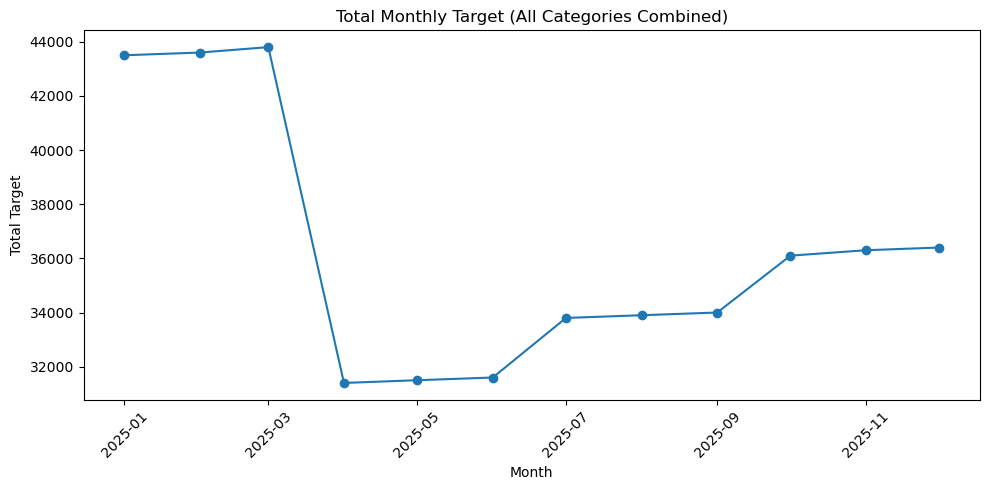

In [49]:
# Visualization to see total portfolio fluctuations

monthly_total = (
    sales
    .groupby("Month", as_index=False)["Target"]
    .sum()
    .rename(columns={"Target": "Total_Target"})
)

monthly_total = monthly_total.sort_values("Month")
monthly_total["Total_Target_MoM_%"] = monthly_total["Total_Target"].pct_change() * 100
monthly_total["Month_ts"] = monthly_total["Month"].dt.to_timestamp()

plt.figure(figsize=(10, 5))
plt.plot(monthly_total["Month_ts"], monthly_total["Total_Target"], marker="o")
plt.title("Total Monthly Target (All Categories Combined)")
plt.xlabel("Month")
plt.ylabel("Total Target")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This line chart shows how the **overall target for the entire portfolio evolves over time**.

We can clearly see:

- If targets are **trending up or down**
- Any **seasonal peaks** (e.g., festive months)
- Months where targets **suddenly jump or drop**

This is useful for:

- **High-level planning**
- Explaining **overall business expectations** month by month


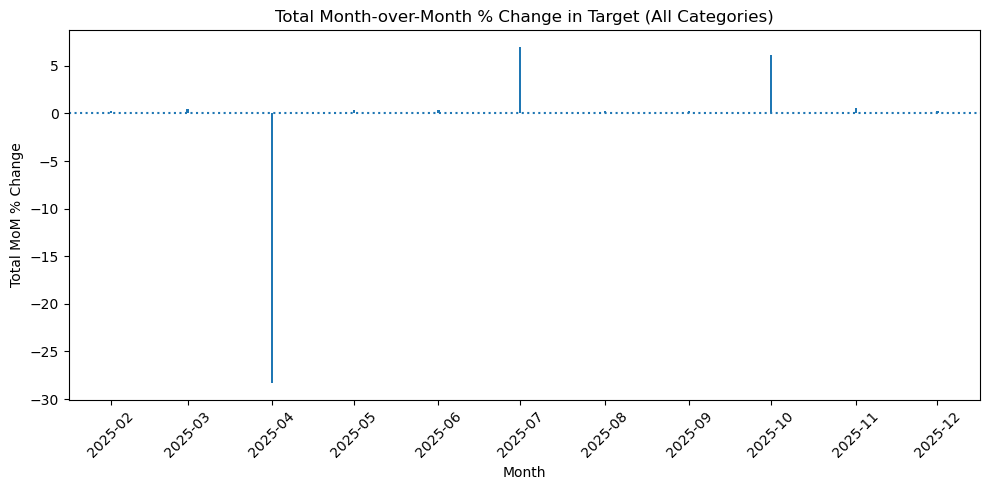

In [48]:
plt.figure(figsize=(10, 5))
plt.bar(monthly_total["Month_ts"], monthly_total["Total_Target_MoM_%"])
plt.axhline(0, linestyle=":")
plt.title("Total Month-over-Month % Change in Target (All Categories)")
plt.xlabel("Month")
plt.ylabel("Total MoM % Change")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This bar chart shows the **percentage change in total target from one month to the next**.

---

### How to read the bars

- **Bars above 0** → months where **total targets increased**  
- **Bars below 0** → months where **total targets were cut**  
- The **height of each bar** shows how big the change was – this helps identify **“spike” months** with unusually large adjustments.

---

### Why this is useful

It helps us understand:

- Highlight months with **significant target fluctuations** that may need justification  
  (e.g., new campaign, expansion, market slowdown, etc.)
- Check whether targets are being adjusted **gradually and consistently**, or in **large, disruptive jumps**

---

### Business benefit

This view:

- Gives stakeholders a clear, **portfolio-level picture** of how ambitious targets have been over time.
- Can later be **compared with actual sales performance** to see whether big changes in targets were realistic or misaligned with real demand.

---

### Helps answer questions like:

- “Are we steadily ramping up targets or swinging too much month to month?”  
- “Which months had the biggest jumps or cuts in expectations?”


Category: Clothing
Mean MoM Target Change (%):   0.54
Median MoM Target Change (%): 0.00
Std Dev of MoM Change (%):    10.51


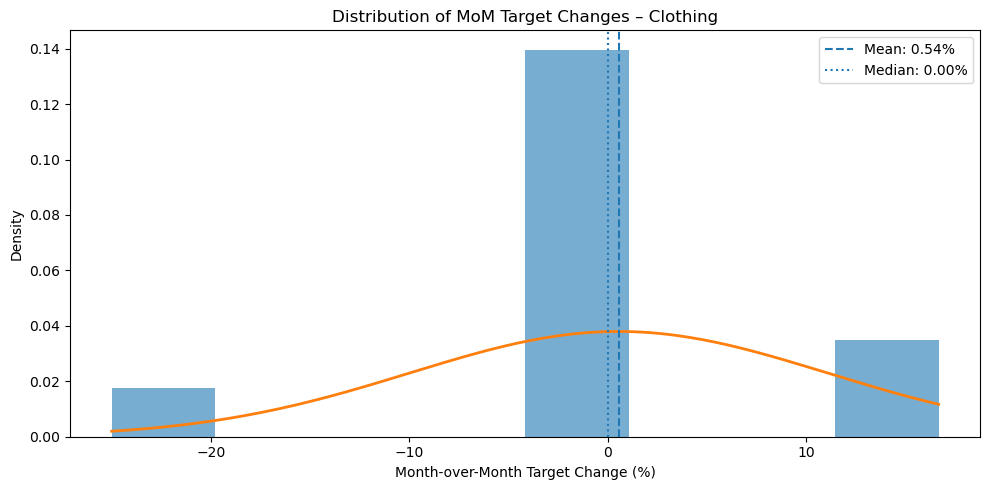

In [36]:
sales["Month of Order Date"] = pd.to_datetime(sales["Month of Order Date"])

# Work at Year-Month level
sales["Month"] = sales["Month of Order Date"].dt.to_period("M")

# Aggregate in case multiple rows per month/category
monthly_cat = (
    sales
    .groupby(["Month", "Category"], as_index=False)["Target"]
    .sum()
)

# Sort and compute MoM % change per category
monthly_cat = monthly_cat.sort_values(["Category", "Month"])
monthly_cat["Target_MoM_%"] = (
    monthly_cat
    .groupby("Category")["Target"]
    .pct_change() * 100
)

# Drop the first NaN per category (no previous month)
monthly_cat = monthly_cat.dropna(subset=["Target_MoM_%"])

# Convert Month to timestamp for reference (not strictly needed here)
monthly_cat["Month_ts"] = monthly_cat["Month"].dt.to_timestamp()


#Choose a category from the category column e.g. furniture, clothing, electronics
category_name = "Clothing"  # change to any category you want

cat_changes = monthly_cat[monthly_cat["Category"] == category_name]["Target_MoM_%"]

if cat_changes.empty:
    raise ValueError(f"No data found for category: {category_name}")


# Basic statistics (measures of central tendency)

mean_change = cat_changes.mean()
median_change = cat_changes.median()
std_change = cat_changes.std()

print(f"Category: {category_name}")
print(f"Mean MoM Target Change (%):   {mean_change:.2f}")
print(f"Median MoM Target Change (%): {median_change:.2f}")
print(f"Std Dev of MoM Change (%):    {std_change:.2f}")


# Histogram + bell curve

plt.figure(figsize=(10, 5))

# Histogram of MoM % changes
count, bins, _ = plt.hist(cat_changes, bins=8, density=True, alpha=0.6)

# Create x range for the bell curve
x = np.linspace(cat_changes.min(), cat_changes.max(), 200)

# Normal (Gaussian) PDF(Probability Distribution Function) with same mean and std as your data
pdf = (1 / (std_change * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean_change) / std_change) ** 2)

# Plot the bell curve
plt.plot(x, pdf, linewidth=2)

# Vertical lines for mean and median
plt.axvline(mean_change, linestyle="--", linewidth=1.5, label=f"Mean: {mean_change:.2f}%")
plt.axvline(median_change, linestyle=":", linewidth=1.5, label=f"Median: {median_change:.2f}%")

plt.title(f"Distribution of MoM Target Changes – {category_name}")
plt.xlabel("Month-over-Month Target Change (%)")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


### Plot a histogram + bell curve

We draw:

- A **histogram of MoM % changes**  
  (how many months had −10%, 0%, +15%, etc.).
- A **normal (bell) curve** with the same mean and standard deviation  
  to visualise what a “typical” distribution of changes looks like.
- **Vertical lines** for **mean** and **median** to highlight where the centre of the data lies.

---

### What is the benefit?

It tells us how **stable** our target-setting process is for **Clothing**:

- **Small mean & median** → we’re not randomly inflating or cutting targets every month.
- **Standard deviation and histogram shape** → show whether we have occasional overreactions  
  (very large jumps in target).

---

### It helps identify:

- **Outlier months** where targets changed unusually sharply  
  (these need explanation: new campaign? seasonal spike? unrealistic planning?).
- Whether targets are being updated **gradually and consistently**  
  or in a **stop–start, volatile** pattern.

---

### In business terms, this supports:

- **Better planning** – avoid sudden, unrealistic jumps in targets that demotivate teams.
- **Data-driven discussions** – you can say:  
  > “For Clothing, targets are usually stable, with a typical change of around 0–10%,  
  > and only a few months with big swings.”
- **Alignment with performance** – later you can compare these target changes with actual sales changes to see if targets reflect real demand trends.


- The above code is only showing for clothing category but just by changing the category we generate graphs for other categories as well


## **Part 3:  Regional Performance Insights**

### **Question 1**
**Identifying the top 5 states with the highest order count and for each of these states, calculate the total sales and average profit.** 

In [27]:
# 2. Top 5 states by ORDER COUNT (from List_of_Orders)
state_order_counts = (
    orders_list
    .groupby("State")["Order ID"]
    .nunique()                # distinct orders per state
    .sort_values(ascending=False)
)

top_5_states = state_order_counts.head(5).index.tolist()
print("Top 5 states by order count:")
print(state_order_counts.head(5))

# 3. Merge orders with order_details to attach Amount & Profit to each order/state
merged = pd.merge(
    orders_list,
    order_details,
    on="Order ID",
    how="inner"
)

# 4. Filter merged data for ONLY those top 5 states
top_states_data = merged[merged["State"].isin(top_5_states)].copy()

# 5. For each of these states, calculate:
#    - total sales (sum of Amount)
#    - average profit (mean of Profit)
state_summary = (
    top_states_data
    .groupby("State")
    .agg(
        Order_Count=("Order ID", "nunique"),
        Total_Sales=("Amount", "sum"),
        Avg_Profit=("Profit", "mean")
    )
    .sort_values("Order_Count", ascending=False)
)

print("\nSummary for top 5 states:")
print(state_summary)

# 6. (Optional) Save results
state_summary.to_excel("Top5_States_Sales_Profit_Summary.xlsx")


Top 5 states by order count:
State
Madhya Pradesh    101
Maharashtra        90
Rajasthan          32
Gujarat            27
Punjab             25
Name: Order ID, dtype: int64

Summary for top 5 states:
                Order_Count  Total_Sales  Avg_Profit
State                                               
Madhya Pradesh          101       105140   16.326471
Maharashtra              90        95348   21.296552
Rajasthan                32        21149   16.986486
Gujarat                  27        21058    5.344828
Punjab                   25        16786  -10.150000


### **Question 2**
**Highlighting any regional disparities in sales or profitability.**

State-level sales and profitability summary:
                   Total_Sales  Total_Profit  Order_Count  Profit_Margin_%  \
State                                                                        
Madhya Pradesh          105140          5551          101         5.279627   
Maharashtra              95348          6176           90         6.477325   
Delhi                    22531          2987           22        13.257290   
Uttar Pradesh            22359          3237           22        14.477392   
Rajasthan                21149          1257           32         5.943543   
Gujarat                  21058           465           27         2.208187   
Punjab                   16786          -609           25        -3.628023   
Karnataka                15058           645           21         4.283437   
West Bengal              14086          2500           22        17.748119   
Kerala                   13459          1871           16        13.901479   
Andhra Pradesh     

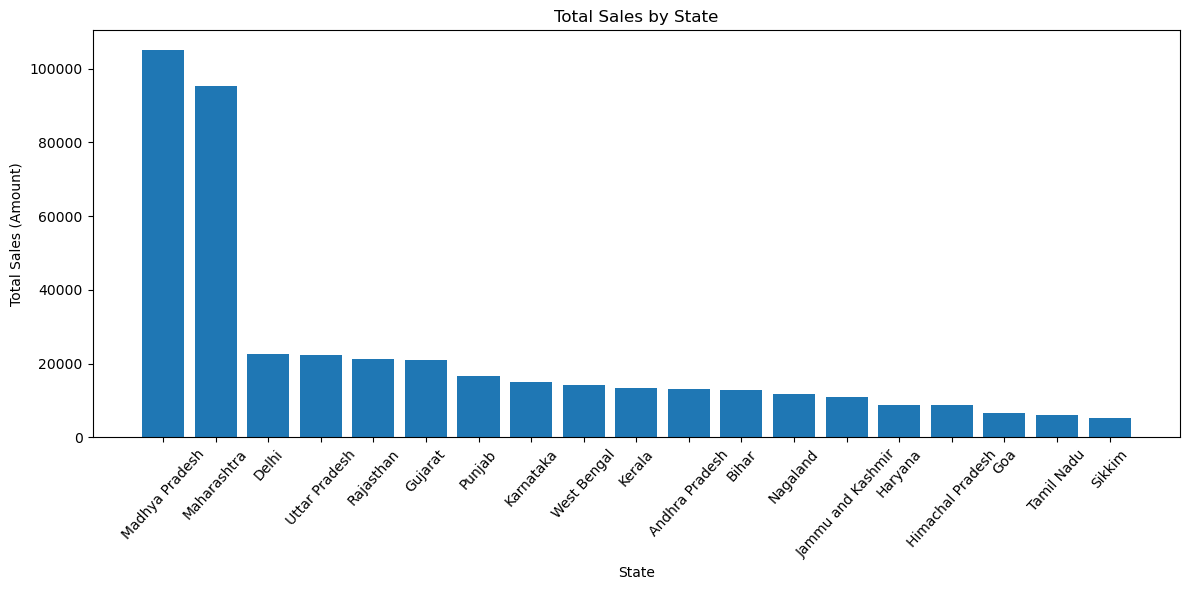

In [42]:
merged = pd.merge(
    orders_list,
    order_details,
    on="Order ID",
    how="inner"
)

# 3. Aggregate metrics by State
state_summary = (
    merged
    .groupby("State")
    .agg(
        Total_Sales=("Amount", "sum"),
        Total_Profit=("Profit", "sum"),
        Order_Count=("Order ID", "nunique")
    )
)

# 4. Calculate additional profitability metrics
state_summary["Profit_Margin_%"] = (
    state_summary["Total_Profit"] / state_summary["Total_Sales"] * 100
)

state_summary["Avg_Profit_per_Order"] = (
    state_summary["Total_Profit"] / state_summary["Order_Count"]
)

# Sort states by Total_Sales (for nicer plots)
state_summary = state_summary.sort_values("Total_Sales", ascending=False)

print("State-level sales and profitability summary:")
print(state_summary)


# VISUALIZATION 1:
# Bar chart – Total Sales by State

plt.figure(figsize=(12, 6))
plt.bar(state_summary.index, state_summary["Total_Sales"])
plt.title("Total Sales by State")
plt.xlabel("State")
plt.ylabel("Total Sales (Amount)")
plt.xticks(rotation=48)
plt.tight_layout()
plt.show()



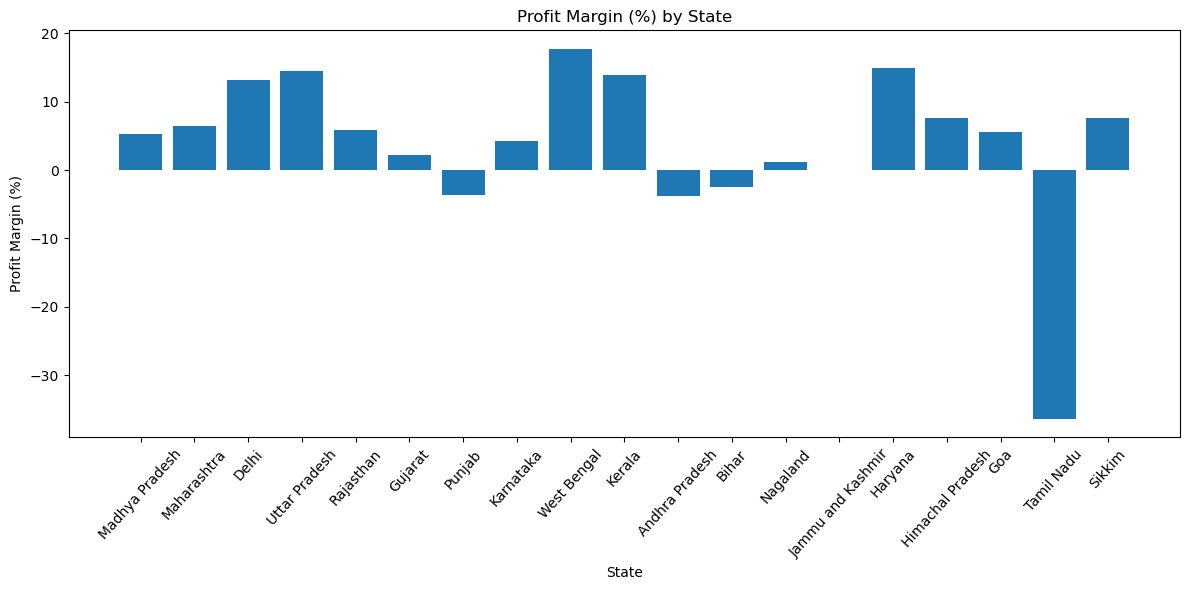

In [43]:
# VISUALIZATION 2:
# Bar chart – Profit Margin % by State

plt.figure(figsize=(12, 6))
plt.bar(state_summary.index, state_summary["Profit_Margin_%"])
plt.title("Profit Margin (%) by State")
plt.xlabel("State")
plt.ylabel("Profit Margin (%)")
plt.xticks(rotation=48)
plt.tight_layout()
plt.show()

---

## Following regions/states should be prioritized for improvement as they are suffering from Negative Profit Margins

These are **destroying value** and should be **top priority** for fixing:

---

### Tamil Nadu
- **Total_Profit:** –2,216  
- **Profit_Margin_%:** –36.4% *(by far the worst)*  

### Andhra Pradesh

- **Profit_Margin_%:** –3.74%  
- **Avg_Profit_per_Order:** –33.07  

### Punjab

- **Profit_Margin_%:** –3.63%  
- **Avg_Profit_per_Order:** –24.36  

### Bihar

- **Profit_Margin_%:** –2.48%  
- **Avg_Profit_per_Order:** –20.06  

👉 These three states have **reasonable sales but lose money overall**.

**Focus areas:**

- Check **shipping and logistics costs**.  
- Review **discounts and promotions** offered in these regions.  
